# CNN Dataloader

Joshua Temple, Group 4

PLB 841, FS22, Michigan State University

## Overview

This notebook takes processed ETC vectors from a sample dataset created by group 3, loads the files into an array, processes them into Tensors, loads them into a TensorDataset, and places them in a DataLoader.

The reshaped ETC arrays are visualized using heatmaps.

## Refereces

- https://blog.paperspace.com/dataloaders-abstractions-pytorch/
- https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
- https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/
- Dataloader: https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader

In [1]:
# import libraries
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import os
import seaborn as sns

# Iterate through sample dataset

The cell below iterates through the ETC data files in the "../group3-math/processed_vectors/" folder, uncompresses the pickle files, loads the ETC data into an array, then reshapes the ECT data.

In [2]:
data = []
labels = []

# iterate through all files in the directory
for root, dirs, files in os.walk("../group3-math/processed_vectors/"):
    for file in files:

        # select the pickle files
        if file.endswith(".pkl"):

            # get the protein name from the file name
            protein = file.split(".")[0]
            labels.append(protein)

            # load the pickle file and append data to list
            with open(os.path.join(root, file), 'rb') as f:
                arr = np.array(pickle.load(f))
                data.append(arr)

# reshape data to 2D array and convert to numpy array
data = np.array([np.reshape(x, newshape=(5,100)) for x in data])
data

array([[[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 3, 5, ..., 1, 1, 1]],

       [[0, 0, 1, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 1, 3, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 5, 5, 4],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 3, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]]]

# Convert to Tensor for the Dataloader

The cell below uses the above arrays as x_data and generates some fake y_data until the classification data is ready.  Then, it converts the x,y data into Tensors, combines them into a TensorDataset, and creates the Dataloader which can be accessed by the CNN later.

In [3]:
# use data above as x values
x_data = data

# generate fake y values until we have real ones
y_data = np.random.randint(0, 2, size=(len(data), 1))

# transform x,y to  tensor
tensor_x = torch.Tensor(x_data) 
tensor_y = torch.Tensor(y_data)

# create tensor dataset for the dataloader
dataset = TensorDataset(tensor_x,tensor_y)

# create the dataloader class
data_loader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,) 

data_loader

# Visualize the ETC Data

The following cell visualizes the reshaped ETC data using heatmaps.

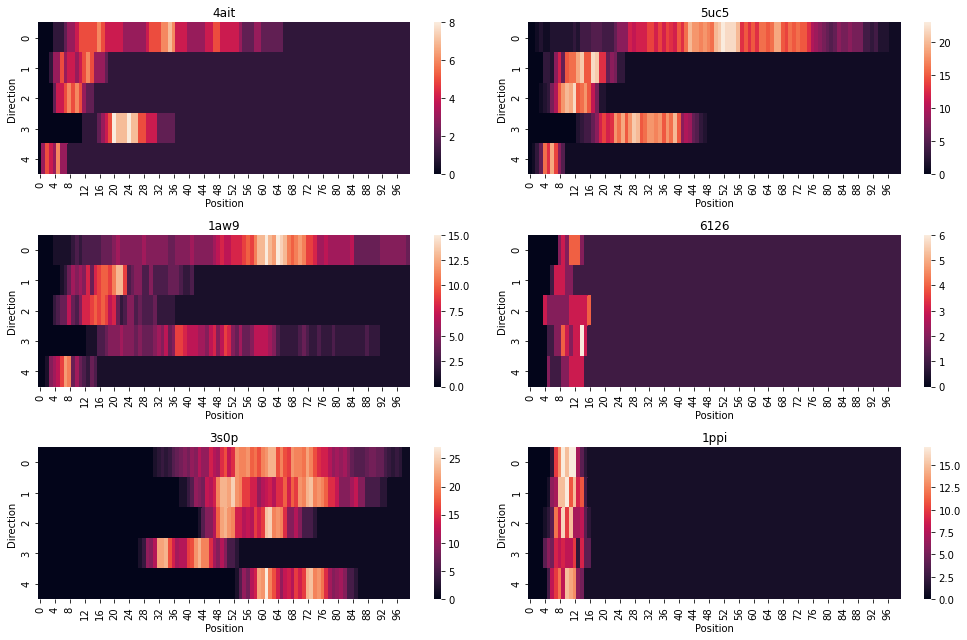

In [4]:
# get the number of proteins and calculate how many subplots we need
n_proteins = len(data)
n_rows = int(np.ceil(n_proteins/2))
figheight = n_rows*3

#  visualize each protein from the sample dataset
fig, ax = plt.subplots(n_rows, 2, figsize=(14, figheight))

# iterate through the axies and plot each protein
for i, ax in enumerate(ax.flatten()):
    sns.heatmap(data[i], ax=ax, label=labels[i])
    ax.set_title(labels[i])
    ax.set_ylabel('Direction')
    ax.set_xlabel('Position')

# format the plot
plt.tight_layout()
# plt.savefig('sample_proteins.png', dpi=600, facecolor='w', edgecolor='w',)
plt.show()